<a href="https://colab.research.google.com/github/lkarjun/malayalam-language-model/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Downloading

In [1]:
!pip install dvc[gdrive]

!dvc get https://github.com/lkarjun/malayalam-language-model \
datasets/

     |████████████████████████████████| 401 kB 5.1 MB/s 
     |████████████████████████████████| 49 kB 5.5 MB/s 
     |████████████████████████████████| 215 kB 48.8 MB/s 
     |████████████████████████████████| 109 kB 57.9 MB/s 
     |████████████████████████████████| 41 kB 36 kB/s 
     |████████████████████████████████| 133 kB 59.8 MB/s 
     |████████████████████████████████| 44 kB 2.4 MB/s 
     |████████████████████████████████| 48 kB 4.0 MB/s 
     |████████████████████████████████| 280 kB 56.8 MB/s 
     |████████████████████████████████| 4.5 MB 52.6 MB/s 
     |████████████████████████████████| 287 kB 67.6 MB/s 
     |████████████████████████████████| 180 kB 66.8 MB/s 
     |████████████████████████████████| 547 kB 75.7 MB/s 
     |████████████████████████████████| 1.1 MB 46.3 MB/s 
     |████████████████████████████████| 3.6 MB 48.7 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 55 kB 3.1 MB/s 
     |██████████████████████


    https://accounts.google.com/o/oauth2/auth?client_id=710796635688-iivsgbgsb6uv1fap6635dhvuei09o66c.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.appdata&access_type=offline&response_type=code&approval_prompt=force

Enter verification code: 4/1AX4XfWhjQsnXPsCL-FNLDMEBc6EWdLpehWqpkHYYLJ-0X3IEqUfBlSWLicA
Authentication successful.


In [2]:
!unzip 'datasets/*.zip' -d datasets/

Streaming output truncated to the last 5000 lines.
  inflating: datasets/magazine_raw/mag3577.txt  
  inflating: datasets/magazine_raw/mag3578.txt  
  inflating: datasets/magazine_raw/mag3579.txt  
  inflating: datasets/magazine_raw/mag358.txt  
  inflating: datasets/magazine_raw/mag3580.txt  
  inflating: datasets/magazine_raw/mag3581.txt  
  inflating: datasets/magazine_raw/mag3582.txt  
  inflating: datasets/magazine_raw/mag3583.txt  
  inflating: datasets/magazine_raw/mag3584.txt  
  inflating: datasets/magazine_raw/mag3585.txt  
  inflating: datasets/magazine_raw/mag3586.txt  
  inflating: datasets/magazine_raw/mag3587.txt  
  inflating: datasets/magazine_raw/mag3588.txt  
  inflating: datasets/magazine_raw/mag3589.txt  
  inflating: datasets/magazine_raw/mag359.txt  
  inflating: datasets/magazine_raw/mag3590.txt  
  inflating: datasets/magazine_raw/mag3591.txt  
  inflating: datasets/magazine_raw/mag3592.txt  
  inflating: datasets/magazine_raw/mag3593.txt  
  inflating: dataset

# Packages importing

In [5]:
import pandas as pd
import spacy
from tqdm import tqdm
from pathlib import Path
import textacy.preprocessing as tprep
import re

tqdm.pandas()

BASE_PATH = Path("../Datasets/")

In [259]:
from fastai.text.core import *
from fastai.text.all import *

# Dataset Loading

In [3]:
mag = pd.read_csv(BASE_PATH/'magazine_files.csv')
wiki = pd.read_csv(BASE_PATH/'wikitext_files.csv')

In [4]:
mag.head(4)

,file_path,dataset_name,length
0,datasets/magazine_raw/mag0.txt,magazine_text,4383
1,datasets/magazine_raw/mag10.txt,magazine_text,7582
2,datasets/magazine_raw/mag100.txt,magazine_text,2508
3,datasets/magazine_raw/mag1000.txt,magazine_text,2222


In [6]:
def open_files(path: str):
    with open(path, 'r', encoding='utf-8') as file:
        txt = file.read()
    return txt

mag['content'] = mag['file_path'].progress_apply(open_files)
wiki['content'] = wiki['file_path'].progress_apply(open_files)

100%|██████████████████████████████████████████████| 11341/11341 [02:26<00:00, 77.63it/s]


In [7]:
mag.head(4)

,file_path,dataset_name,length,content
0,datasets/magazine_raw/mag0.txt,magazine_text,4383,ഇന്ത്യയിലെ ആദ്യത്തെ വനിതാ ഐ‌എ‌എസ് ഉദ്യോഗസ്ഥയെ ...
1,datasets/magazine_raw/mag1.txt,magazine_text,1140,"ഒരു മ്യുസീഷന് ഡാന്‍സ് ചെയ്യാനാവും, ഡ്രം വായിക്..."
2,datasets/magazine_raw/mag10.txt,magazine_text,7582,"'മോളേ, ടോണിയെ അകത്ത് കയറ്റണോ?' 'ഹേയ്! ആള്‍ക്ക..."
3,datasets/magazine_raw/mag100.txt,magazine_text,2508,കൊവിഡ് സൃഷ്ടിച്ച സാമ്പത്തിക പ്രതിസന്ധിയിൽ നിന്...


In [47]:
wiki.head(4)

,file_path,dataset_name,length,content
0,datasets/wikitext_raw/wiki0.txt,wiki_text,303,2015 ലെ ഇടശ്ശേരി പുരസ്കാരം നേടിയ ചെറുകഥാകൃത്ത്...
1,datasets/wikitext_raw/wiki1.txt,wiki_text,3242,"മൃദുവും, വെളുത്ത നിറത്തിലുള്ളതും, തിളക്കമേറിയത..."
2,datasets/wikitext_raw/wiki10.txt,wiki_text,2539,ഡയറക് ടിവി കാലിഫോർണിയ കേന്ദ്രമായിട്ടുള്ള ഡയറക്...
3,datasets/wikitext_raw/wiki100.txt,wiki_text,2274,"ധൂമകേതുവിന്റെ വാൽ, കോമ എന്നിവ സുര്യനടുത്തുകൂടി..."


# Preprocessing

## Checking impurity

In [48]:
RE_SUSPICIOUS = re.compile(r'\(.*?\)|[a-zA-Z]')

def check_impurity(content: str, min_len = 200):
    '''returns the share of suspicious characters in a text'''
    len_text = len(content)
    if content == None or len_text < min_len:
        return 0
    return len(RE_SUSPICIOUS.findall(content)) / len_text


In [11]:
mag['impurity'] = mag['content'].progress_apply(check_impurity)

100%|██████████████████████████████████████████████| 7863/7863 [00:01<00:00, 3960.81it/s]


In [49]:
wiki['impurity'] = wiki['content'].progress_apply(check_impurity)

100%|████████████████████████████████████████████| 11341/11341 [00:01<00:00, 8568.37it/s]


In [12]:
mag.sort_values(by = 'impurity', ascending=False).head(5)

,file_path,dataset_name,length,content,impurity
7389,datasets/magazine_raw/mag7649.txt,magazine_text,1736,"രാജ്യം സ്വാതന്ത്ര്യ ദിനം ആഘോഷിക്കുമ്പോള്‍, നാ...",0.591014
7500,datasets/magazine_raw/mag7749.txt,magazine_text,7809,കാലിഫോര്‍ണിയ: ഗ്ലാമറിന്റെ ലോകം ഉപേക്ഷിച്ച് ആത്...,0.576770
5429,datasets/magazine_raw/mag5885.txt,magazine_text,3058,അഞ്ചുവയസുകാരിയായ ഈ നൈജീരിയന്‍ പെണ്‍കുട്ടി സകല ...,0.466645
7410,datasets/magazine_raw/mag7668.txt,magazine_text,4918,തിരുവനന്തപുരം: വ്യത്യസ്ത ലൈംഗികതയുടെ സൗന്ദര്യം...,0.458723
4705,datasets/magazine_raw/mag5232.txt,magazine_text,1965,"ദില്ലി: മഞ്ഞുകാലമായി, വാര്‍ഡ്രോബില്‍ നിന്നും സ...",0.450382


In [50]:
wiki.sort_values(by = 'impurity', ascending=False).head(5)

,file_path,dataset_name,length,content,impurity
7277,datasets/wikitext_raw/wiki6028.txt,wiki_text,3400,\nXenochloa arundinacea Licht.Trichoon phragmi...,0.811765
6828,datasets/wikitext_raw/wiki5587.txt,wiki_text,1406,\n.Gyrocarpus americanus is a flowering plant ...,0.794452
8860,datasets/wikitext_raw/wiki7581.txt,wiki_text,223,Version 2014.2 of the IUCN Red List of Threate...,0.793722
3995,datasets/wikitext_raw/wiki2807.txt,wiki_text,778,This is a list of winners of the Academy Award...,0.778920
10353,datasets/wikitext_raw/wiki9037.txt,wiki_text,5225,വംശനാശഭീഷണിയുള്ള ജീവവർഗ്ഗങ്ങളുടെ സംരക്ഷണത്തിനാ...,0.776459


In [56]:
print("----------------------------------------------------------\n")
print("Total Magazine Files: ", len(mag))
print("Total Not Pure Magazine Files: ", len(mag[mag['impurity'] >= .03]))
print("\n----------------------------------------------------------")

----------------------------------------------------------

Total Magazine Files:  7863
Total Not Pure Magazine Files:  324

----------------------------------------------------------


In [57]:
print("----------------------------------------------------------\n")
print("Total WikiText Files: ", len(wiki))
print("Total Not Pure WikiText Files: ", len(wiki[wiki['impurity'] >= .03]))
print("\n----------------------------------------------------------")

----------------------------------------------------------

Total WikiText Files:  11341
Total Not Pure WikiText Files:  1161

----------------------------------------------------------


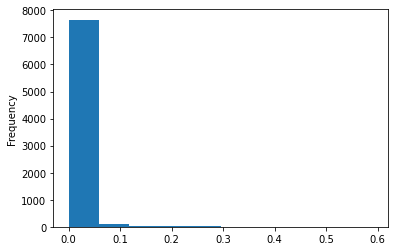

In [60]:
mag.impurity.plot.hist();

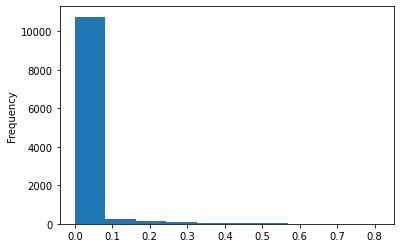

In [58]:
wiki.impurity.plot.hist();

In [42]:
mag[mag['impurity'] <= .03].to_csv(BASE_PATH/'magazine_files.csv', index = False)

In [59]:
wiki[wiki['impurity'] >= .03].to_csv(BASE_PATH/'wikitext_files.csv', index = False)

In [64]:
mag = mag[mag['impurity'] <= .03].drop(['impurity', 'length'], axis = 1)
wiki = wiki[wiki['impurity'] <= .03].drop(['impurity', 'length'], axis = 1)

In [68]:
mag['length'] = mag['content'].map(len)
wiki['length'] = wiki['content'].map(len)

In [72]:
mag.drop('content', axis = 1).to_csv(BASE_PATH/'magazine_files.csv', index = False)
wiki.drop('content', axis = 1).to_csv(BASE_PATH/'wikitext_files.csv', index = False)

## Checking Proper Tokenizing or Not

In [260]:
mag = pd.read_csv(BASE_PATH/'magazine_files.csv')
wiki = pd.read_csv(BASE_PATH/'wikitext_files.csv')

In [261]:
mag['content'] = mag['file_path'].progress_apply(open_files)
wiki['content'] = wiki['file_path'].progress_apply(open_files)

100%|███████████████████████████████████████████████████████████████████████████| 10180/10180 [01:56<00:00, 87.49it/s]


In [262]:
tok = WordTokenizer(lang='ml')

In [263]:
def get_sample(wiki_=True, size = 1, random_state = 32):
    if wiki_:
        return first(wiki.sample(size)['content'], random_state=32)
    return first(mag.sample(size)['content'], random_state=32)

In [264]:
coll_repr(first(tok([get_sample()])), 50)

"(#48) ['ഭാരതീയസംഗീതപദ്ധതികളിൽ','ഉപയോഗിക്കപ്പെടുന്ന','സപ്തസ്വരങ്ങളിൽ','അഞ്ചാമത്തേതാണ്\\u200c','പഞ്ചമം.','സ്വരം','പാടുന്നതിനും','സൂചിപ്പിക്കുന്നതിനും','പ','എന്ന','അക്ഷരം','ഉപയോഗിക്കുന്നു.','കർണ്ണാടകസംഗീതത്തിൽ','ഷഡ്ജവും','പഞ്ചമവും','പ്രകൃതിസ്വരങ്ങളായി','കണക്കാക്കുന്നു.','പഞ്ചമത്തെ','കുയിലിന്റെ','സ്വരത്തോടാണ്\\u200c','താരതമ്യപ്പെടുത്താറുള്ളത്.','\\n','ഭാരതീയശാസ്ത്രീയസംഗീതപദ്ധതികളിൽ','ശ്രുതിഭേദങ്ങളില്ലാത്ത','പ്രകൃതിസ്വരങ്ങളായ','ഷഡ്ജം',',','പഞ്ചമം','എന്നിവ','മീട്ടുന്ന','രീതിയിലാണ്\\u200c','വയലിൻ',',','വീണ','മുതലായവയുടെ','കമ്പികൾ','ക്രമീകരിക്കുന്നത്.','\\n','കർണ്ണാടകസംഗീത','സംഗീതവുമായി','ബന്ധപ്പെട്ട','ഈ','ലേഖനം','അപൂർണ്ണമാണ്\\u200c.','ഇതു','വികസിപ്പിക്കുവാൻ','സഹായിക്കുക.','\\n']"

In [265]:
# 'കണക്കാക്കുന്നു.' tokenizer is not separating the fullstop.

In [266]:
coll_repr(first(tok([get_sample(False)])), 50)

"(#443) ['ട്രാഫിക്','രാമസ്വാമി','എന്നറിയപ്പെടുന്ന','കെ.','ആർ','രാമസ്വാമി','ഒരു','അഴിമതി','വിരുദ്ധ','പ്രവർത്തകനാണ്.','ഉന്നതരുടെയും','ശക്തരുടെയും','അനധികൃത','പോസ്റ്ററുകളും','പരസ്യബോർഡുകളും','ചെന്നൈയിലെ','തെരുവോരങ്ങളിൽ','നിന്ന്','എടുത്തുമാറ്റാനുള്ള','ശ്രമങ്ങളാണ്','രാമസ്വാമിയെ','വ്യത്യസ്\\u200dതനാക്കിയത്.','അതിനായി','കോടതിയെ','സമീപിക്കാനും','അദ്ദേഹം','മടി','കാണിച്ചിരുന്നില്ല.','തന്റെ','വഴിയിൽ','ഒരു','തടസമാകാൻ','വാർദ്ധക്യത്തെ','അദ്ദേഹം','ഒരിക്കലും','അനുവദിച്ചിരുന്നുമില്ല.','എന്നാൽ',',','ജനങ്ങളുടെ','ആവശ്യങ്ങൾക്ക്','വേണ്ടി','പ്രവർത്തിച്ച','അദ്ദേഹം','ഹൃദയാഘാതത്തെ','തുടർന്ന്','ചൊവ്വാഴ്ച','രാത്രി','ചെന്നൈയിലെ','രാജീവ്','ഗാന്ധി'...]"

In [79]:
mag[mag['content'].str.contains('ലോസ് കാബോസ്')]

,file_path,dataset_name,length,content
5047,datasets/magazine_raw/mag5731.txt,magazine_text,1692,"ലോസ് കാബോസ്: മെക്സിക്കോയിലെ ഏറ്റവും മികച്ച റിസോര്‍ട്ടായ വിഡാന്ത, ലോകത്തിലെ തന്നെ മികച്ച ജോലിക്കായി അപേക്ഷ ക്ഷണിക്കുന്നു. ജോലി വളരെ സിമ്പിളാണ്. അവരുടെ വിവിധ റിസോര്‍ട്ടുകളില്‍ താമസിക്കണം. മികച്ച മെക്സിക്കന്‍ ഷെഫ് ഉണ്ടാക്കുന്ന ഭക്ഷണം കഴിക്കണം. കരീബിയന്‍ സമുദ്രത്തില്‍ തിമിംഗലക്കുഞ്ഞുങ്ങള്‍ക്കൊപ്പം കുളിക്കണം അങ്ങനെ... അങ്ങനെ... ഒരു വിനോദസഞ്ചാരിയാവുകയാണ് ജോലി. ശമ്പളമോ വര്‍ഷത്തില്‍ എണ്‍പത് ലക്ഷത്തിനു മുകളില്‍. ഭക്ഷണത്തിനുള്ള കാര്‍ഡുകളും, യാത്രാ ചെലവും പുറമേയും കിട്ടും. അപേക്ഷ അയച്ച് തെരഞ്ഞെടുക്കപ്പെട്ടാല്‍ റിസോര്‍ട്ടിന്‍റെ ബ്രാൻഡ് അംബാസഡറായി മാറാം. ഒപ്പം വിവിധ സ്ഥലങ്ങളിലെ വിഡാന്തയിലെ റിസോര്‍ട്ടുക..."


In [267]:
sample = '''മികച്ച... മെക്സിക്കന്‍. ഷെഫ്-ഉണ്ടാക്കുന്; .ഭക്ഷണം കഴിക്കണം! കരീബിയന്‍ സമുദ്രത്തില്‍ തിമിംഗലക്കുഞ്ഞുങ്ങള്‍ക്കൊപ്പം കുളിക്കണം അങ്ങനെ... അങ്ങനെ... ഒരു വിനോദസഞ്ചാരിയാവുകയാണ് ജോലി... ശമ്പളമോ വര്‍ഷത്തില്‍ എണ്‍പത് ലക്ഷത്തിനു മുകളില്‍. ഭക്ഷണത്തിനുള്ള കാര്‍ഡുകളും, "യാത്രാ" ചെലവും പുറമേയും കിട്ടും. അപേക്ഷ അയച്ച് തെരഞ്ഞെടുക്കപ്പെട്ടാല്‍ റിസോര്‍ട്ടിന്‍റെ ബ്രാൻഡ് അംബാസഡറായി മാറാം. '''

In [268]:
coll_repr(first(tok([sample])), 10)

"(#41) ['മികച്ച','...','മെക്സിക്കന്\\u200d.','ഷെഫ്-ഉണ്ടാക്കുന്',';','.ഭക്ഷണം','കഴിക്കണം','!','കരീബിയന്\\u200d','സമുദ്രത്തില്\\u200d'...]"

In [257]:
class SpacyTokenizer():
    
    "Spacy Customized tokenizer for `lang`"
    
    def __init__(self, lang='ml', special_toks=None, buf_sz=5000):
        self.special_toks = ifnone(special_toks, defaults.text_spec_tok)
        nlp = spacy.blank(lang)
        for w in self.special_toks: nlp.tokenizer.add_special_case(w, [{ORTH: w}])
        self.pipe,self.buf_sz = nlp.pipe,buf_sz

    def __call__(self, items):
        return (L(doc).attrgot('text') for doc in self.pipe(map(str,items), batch_size=self.buf_sz))


In [270]:
from spacy.tokenizer import Tokenizer as sTokenizer
from spacy.util import compile_prefix_regex, \
 compile_infix_regex, compile_suffix_regex

In [377]:
prefixes = [pattern for pattern in nlp.Defaults.prefixes
             if pattern not in ['-', '_', '#']]

suffixes = [pattern for pattern in nlp.Defaults.suffixes
             if pattern not in ['_']]
            
infixes =  [pattern for pattern in nlp.Defaults.infixes
            if not re.search(pattern, 'xx-xx')]


In [374]:
sample = '''മികച്ച... മെക്സിക്കന്‍. ഷെഫ്-ഉണ്ടാക്കുന്; .ഭക്ഷണം കഴിക്കണം! '''

In [382]:
nlp = spacy.blank('ml')

nlp.tokenizer = sTokenizer(vocab = nlp.vocab,
 rules = nlp.Defaults.tokenizer_exceptions,
 prefix_search = compile_prefix_regex(prefixes).search,
 suffix_search = compile_suffix_regex(['.']).search,
 infix_finditer = compile_infix_regex(infixes).finditer,
 token_match = nlp.Defaults.token_match)


In [383]:
list(nlp(sample))

[മ,
 ി,
 ക,
 ച,
 ്,
 ച,
 .,
 .,
 .,
 മ,
 െ,
 ക,
 ്,
 സ,
 ി,
 ക,
 ്,
 ക,
 ന,
 ്,
 ‍,
 .,
 ഷ,
 െ,
 ഫ,
 ്,
 -,
 ഉ,
 ണ,
 ്,
 ട,
 ാ,
 ക,
 ്,
 ക,
 ു,
 ന,
 ്,
 ;,
 .,
 ഭ,
 ക,
 ്,
 ഷ,
 ണ,
 ം,
 ക,
 ഴ,
 ി,
 ക,
 ്,
 ക,
 ണ,
 ം,
 !]

In [290]:
nlp = spacy.blank('ml')

In [292]:
list(nlp(sample))

[മികച്ച,
 ...,
 മെക്സിക്കന്‍.,
 ഷെഫ്-ഉണ്ടാക്കുന്,
 ;,
 .ഭക്ഷണം,
 കഴിക്കണം,
 !,
 കരീബിയന്‍,
 സമുദ്രത്തില്‍,
 തിമിംഗലക്കുഞ്ഞുങ്ങള്‍ക്കൊപ്പം,
 കുളിക്കണം,
 അങ്ങനെ,
 ...,
 അങ്ങനെ,
 ...,
 ഒരു,
 വിനോദസഞ്ചാരിയാവുകയാണ്,
 ജോലി,
 ...,
 ശമ്പളമോ,
 വര്‍ഷത്തില്‍,
 എണ്‍പത്,
 ലക്ഷത്തിനു,
 മുകളില്‍.,
 ഭക്ഷണത്തിനുള്ള,
 കാര്‍ഡുകളും,
 ,,
 ",
 യാത്രാ,
 ",
 ചെലവും,
 പുറമേയും,
 കിട്ടും.,
 അപേക്ഷ,
 അയച്ച്,
 തെരഞ്ഞെടുക്കപ്പെട്ടാല്‍,
 റിസോര്‍ട്ടിന്‍റെ,
 ബ്രാൻഡ്,
 അംബാസഡറായി,
 മാറാം.]